In [14]:
# import packages
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import linregress
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

In [11]:
# load data
data = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sternberg/2021/Sternberg_cleaned.csv")

In [12]:
# inspect data
data.head()

,setSize,present,id,rt
0,1,n,1,407.000000
1,1,n,2,848.500000
2,1,n,3,549.333333
3,1,n,4,982.333333
4,1,n,5,568.000000


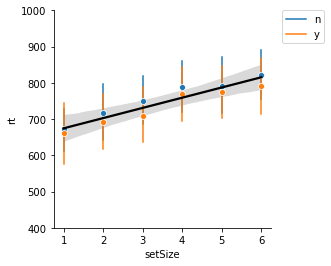

In [15]:
# Make Sternberg-style plot


ax = sns.lineplot(x='setSize', y='rt', data=data, marker='o', hue = 'present', linestyle='', err_style='bars')
ax = sns.regplot(x='setSize', y='rt', marker = '', color = 'black', data=data)
ax.set_ylim(400, 1000)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()



Text(0.5, 1.1, 'Response time (ms) for differently-sized memory sets')

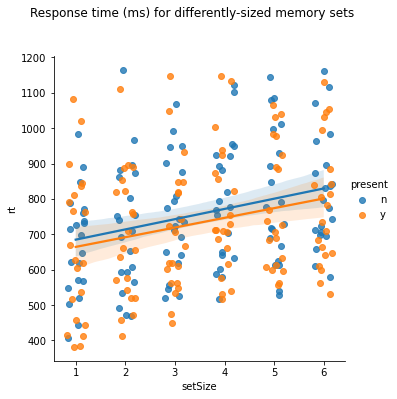

In [16]:
ax = sns.lmplot(
    data = data,
    x = "setSize", y = "rt",
    hue = "present",
    x_jitter = 0.2
)

ax.fig.suptitle("Response time (ms) for differently-sized memory sets",
               y=1.1)

In [17]:
present = list(data.loc[data['present'] == 'y']['rt'])
absent = list(data.loc[data['present'] == 'n']['rt'])

In [18]:
ttest_rel(absent, present)

Ttest_relResult(statistic=2.320459466887937, pvalue=0.021936492553433204)

In [20]:
dfy = data.loc[data['present'] == 'y']
dfn = data.loc[data['present'] == 'n']

In [23]:
data['setSize'].corr(data['rt'])

0.2661705204139128

In [26]:
res = linregress(data['setSize'], data['rt'])
res


LinregressResult(slope=28.16583683101391, intercept=646.3428547386319, rvalue=0.2661705204139128, pvalue=1.8537720725147673e-05, stderr=6.4511386658734535, intercept_stderr=25.12357557440091)

In [27]:
# Basic model: same as scipy linregres

formula = "rt ~ setSize"
model1 = smf.ols(formula = formula, data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     19.06
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           1.85e-05
Time:                        13:54:15   Log-Likelihood:                -1657.9
No. Observations:                 252   AIC:                             3320.
Df Residuals:                     250   BIC:                             3327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    646.3429     25.124     25.727      0.000     596.862     695.824
setSize       28.1658      6.451      4.366      0.000      15.460      40.871
==============================================================================
Omnibus:                       15.701   Durbin-Watson:                   2.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.614
Skew:                           0.416   Prob(JB):                      0.00301
Kurtosis:                       2.357   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
formula = "rt ~ setSize + present"
model2 = smf.ols(formula = formula, data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     10.15
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           5.77e-05
Time:                        13:56:11   Log-Likelihood:                -1657.3
No. Observations:                 252   AIC:                             3321.
Df Residuals:                     249   BIC:                             3331.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      658.5391     27.421     24.016      0.000     604.533     712.545
present[T.y]   -24.3924     22.025     -1.107      0.269     -67.771      18.986
setSize         28.1658      6.448      4.368      0.000      15.466      40.866
==============================================================================
Omnibus:                       15.710   Durbin-Watson:                   2.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.208
Skew:                           0.440   Prob(JB):                      0.00223
Kurtosis:                       2.376   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""